In [27]:
# 01_load_data.ipynb  – Cell 1
from pathlib import Path
import urllib.request            # simple download helper
import mne                       # EEG toolbox
import matplotlib.pyplot as plt  # plotting

# ── create ./data next to this notebook ────────────────────────────────
DATA = Path.cwd() / "data"
DATA.mkdir(exist_ok=True)

print("Data directory:", DATA)

Data directory: /Users/grantmckenzie/data


In [28]:
# 01_load_data.ipynb  – Cell 2
file_ = DATA / "S001R04.edf"     # run 4 from subject 1 (motor-imagery dataset)

if not file_.exists():
    url = "https://physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf?download"
    print("Downloading →", file_.name)
    urllib.request.urlretrieve(url, file_)
else:
    print("File already present:", file_.name)

File already present: S001R04.edf


Extracting EDF parameters from /Users/grantmckenzie/data/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
<RawEDF | S001R04.edf, 64 x 3201 (20.0 s), ~1.6 MiB, data loaded>


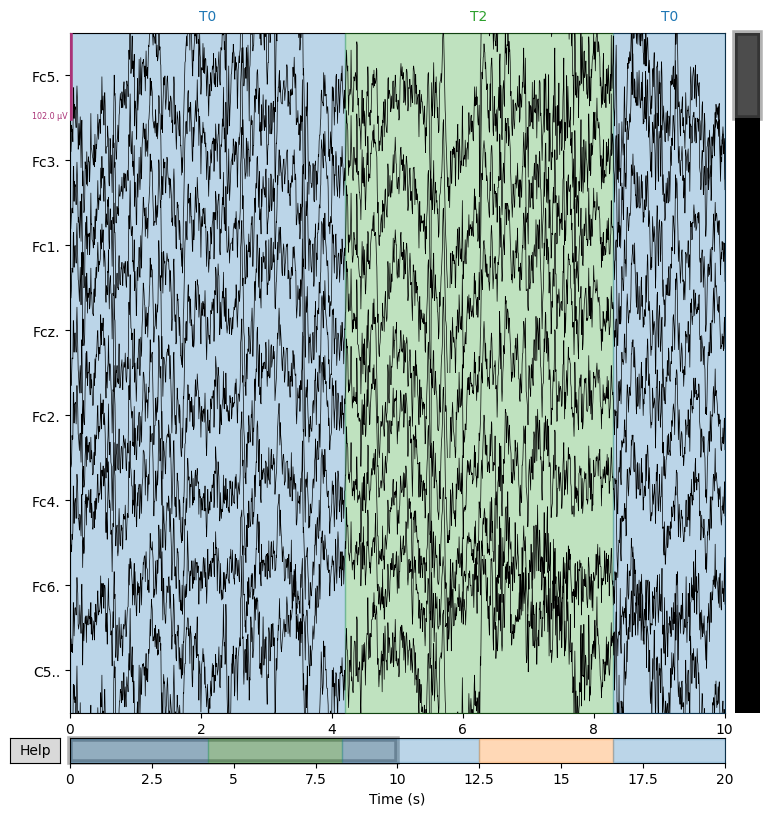

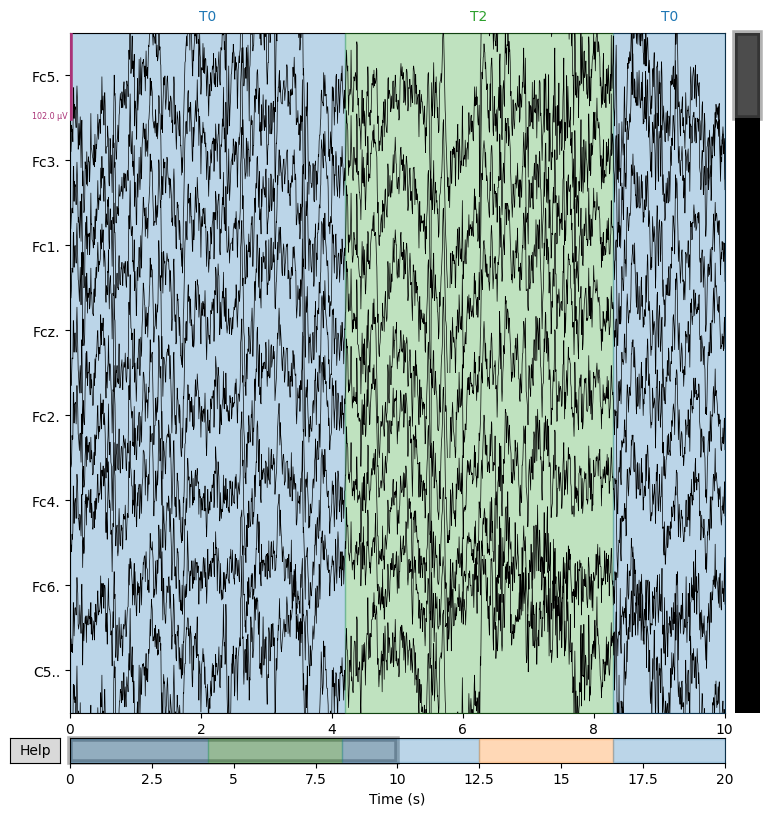

In [29]:
# 01_load_data.ipynb  – Cell 3
raw = mne.io.read_raw_edf(file_, preload=True)
raw.crop(tmin=0, tmax=20)        # keep 20 s so plotting is snappy

print(raw)                       # basic info (channels, fs, etc.)
raw.plot(n_channels=8, scalings="auto")  # interactive viewer

In [30]:
# 01_load_data.ipynb  – Cell 4 (optional)
(light_fname := DATA / "raw_20s.fif").unlink(missing_ok=True)  # overwrite
raw.save(light_fname, overwrite=True)
print("Saved trimmed RAW to", light_fname)

Writing /Users/grantmckenzie/data/raw_20s.fif
Closing /Users/grantmckenzie/data/raw_20s.fif
[done]
Saved trimmed RAW to /Users/grantmckenzie/data/raw_20s.fif


/var/folders/z4/3hnb86v562b2dpw2vfjywdtm0000gn/T/ipykernel_20062/2935960844.py:3: RuntimeWarning: This filename (/Users/grantmckenzie/data/raw_20s.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(light_fname, overwrite=True)
